   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

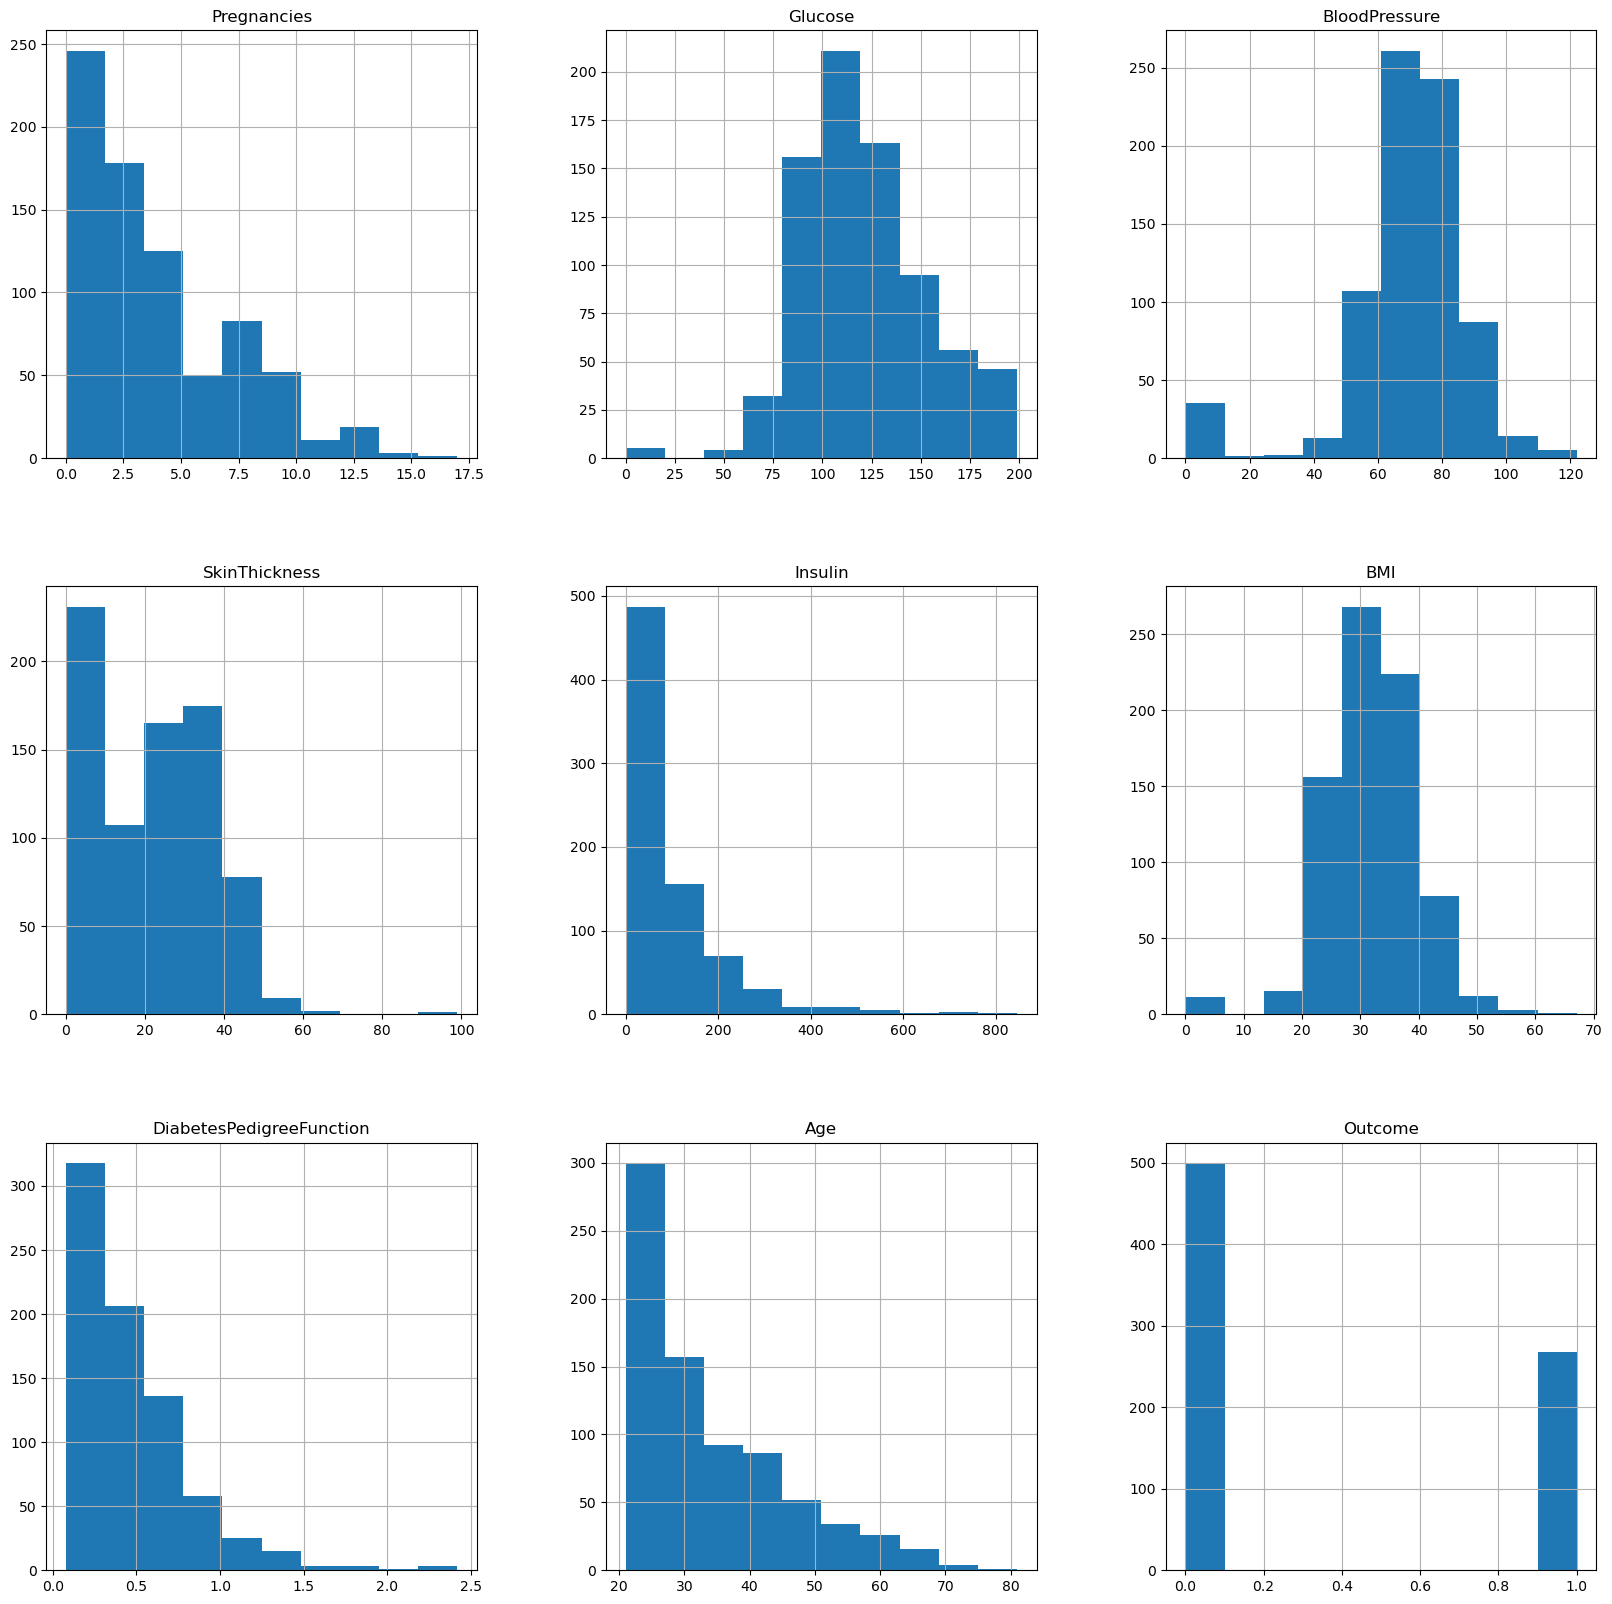

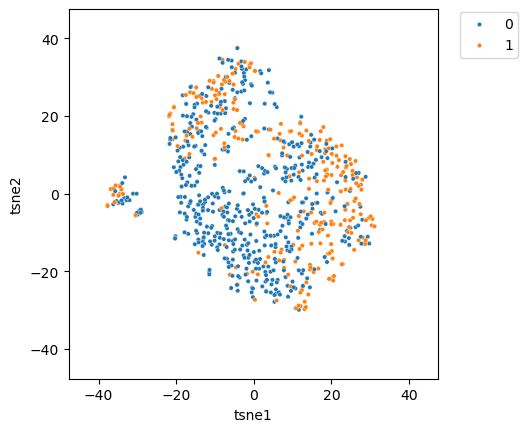

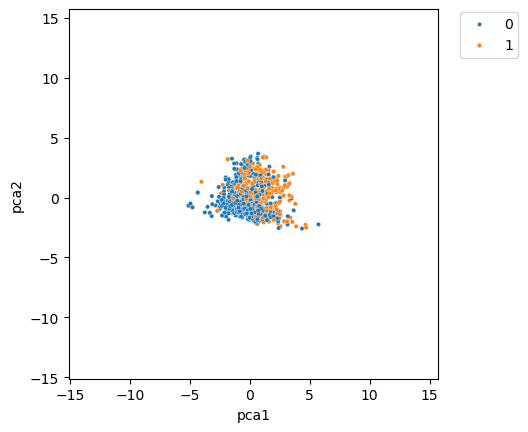

/home/kali/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kali/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kali/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kali/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

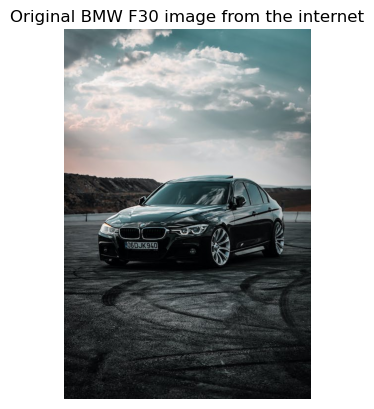

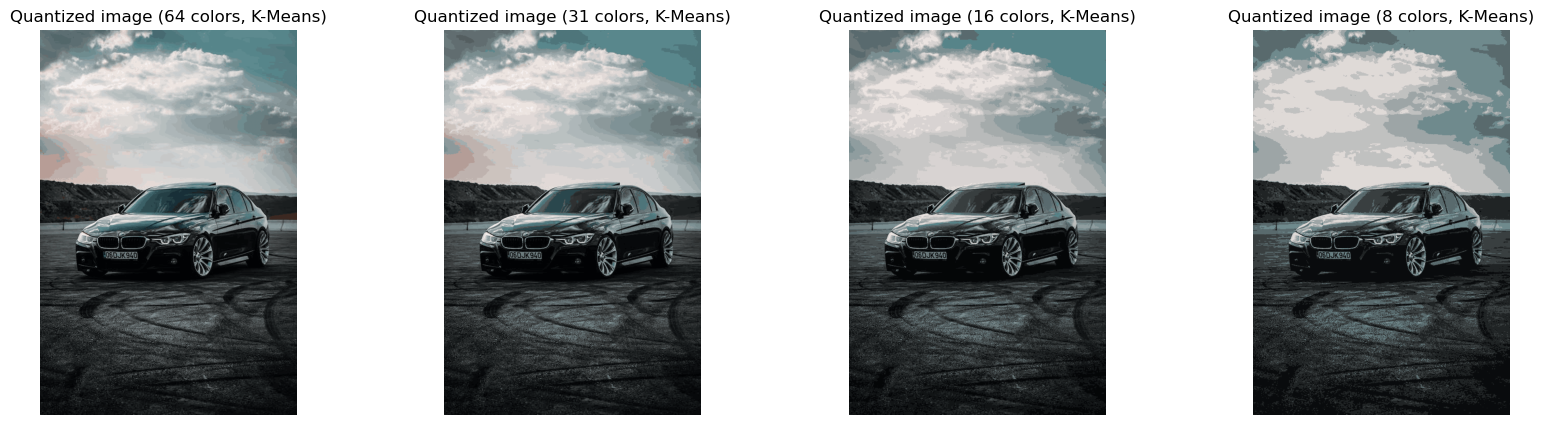

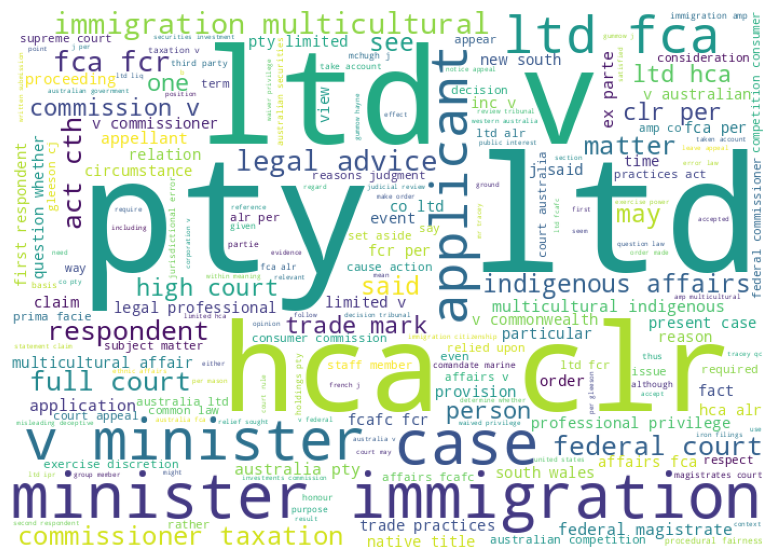

2
3
4
It was identified that the best accuracy is: 0.5295177106263759  and when K = 2
               precision    recall  f1-score   support

     affirmed       0.36      0.50      0.42        26
      applied       0.25      0.44      0.32       494
     approved       0.06      0.13      0.08        15
        cited       0.65      0.76      0.70      2425
   considered       0.32      0.26      0.29       352
    discussed       0.29      0.23      0.25       207
distinguished       0.29      0.21      0.24       102
     followed       0.45      0.27      0.34       463
     referred       0.71      0.31      0.44       893
      related       0.44      0.20      0.28        20

     accuracy                           0.53      4997
    macro avg       0.38      0.33      0.33      4997
 weighted avg       0.55      0.53      0.52      4997



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

from time import time

%matplotlib inline

diabetes_df = pd.read_csv('diabetes.csv')

print(diabetes_df.head())
print(diabetes_df.describe())

p = diabetes_df.hist(figsize = (20,20))

X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

tc = diabetes_df.corr()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
result_of_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame({'tsne1': result_of_tsne[:,0], 'tsne2': result_of_tsne[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne1', y='tsne2', hue='label', data=tsne_df, ax=ax,s=10)
lim_tsne = (result_of_tsne.min()-10, result_of_tsne.max()+10)
ax.set_xlim(lim_tsne)
ax.set_ylim(lim_tsne)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)



from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result_of_pca = pca.fit_transform(X)
import matplotlib.pyplot as plt
import seaborn as sns

pca_df = pd.DataFrame({'pca1': result_of_pca[:,0], 'pca2': result_of_pca[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca1', y='pca2', hue='label', data=pca_df, ax=ax,s=10)
lim_pca = (result_of_pca.min()-10, result_of_pca.max()+10)
ax.set_xlim(lim_pca)
ax.set_ylim(lim_pca)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.show()


from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = [64, 31, 16, 8]
from PIL import Image
# image = plt.imread("/content/drive/MyDrive/DA_kpi/cat_baby.jpeg")
bmw = Image.open("bmw3.jpg")
#china = load_sample_image("/home/ubuntu/Downloads/bmw3.jpeg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
bmw = np.array(bmw, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(bmw.shape)
assert d == 3
image_array = np.reshape(bmw, (w * h, d))

kmeans_arr = []
labels_arr = []
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample))
    labels_arr.append(kmeans_arr[i].predict(image_array))


#codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
#print("Predicting color indices on the full image (random)")

#labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original BMW F30 image from the internet")
plt.imshow(bmw)

num_images = len(n_colors)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))

for i in range(num_images):
    axes[i].imshow(kmeans_arr[i].cluster_centers_[labels_arr[i]].reshape(w, h, -1))
    axes[i].set_title(f"Quantized image ({n_colors[i]} colors, K-Means)")
    axes[i].axis("off")

plt.show()
 

    
    
    
    
    
    
df = pd.read_csv('legal_text_classification.csv', sep=',', usecols=["case_outcome", "case_text"])
df.head() 

from nltk.corpus import stopwords
import re
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


def clean_the_text(text):
  stop_words = stopwords.words("english")
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = text.lower()
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  #print(text)
  return text
df['case_text'] = df['case_text'].apply(lambda x: str(x) if isinstance(x, (str, float)) else '').apply(clean_the_text)
df['case_outcome'] = df['case_outcome'].apply(lambda x: str(x) if isinstance(x, (str, float)) else '').apply(clean_the_text)




def wordcloud_visualisation_of_words(label):
    text = ' '.join(df[df['case_outcome'] == label]['case_text'])
    stopwords = set(STOPWORDS)
    wc_figure = WordCloud(background_color='white', width=700, height=500).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(wc_figure)  
    plt.axis('off')
    plt.show()

wordcloud_visualisation_of_words('cited')
#wordcloud(1, "case_title")


from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer



X = df['case_text']
y = df['case_outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tfidfvectorized = TfidfVectorizer()
X_train_vectorized = tfidfvectorized.fit_transform(X_train)
X_test_vectorized = tfidfvectorized.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(2,5):
    print(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    #print("1")
    knn.fit(X_train_vectorized, y_train)
    #print("1a")
    y_pred = knn.predict(X_test_vectorized)
    #print("1bbbbbbbbbbbb")
    accuracy.append(accuracy_score(y_test, y_pred))
    #print("1ccccc")
    
print("It was identified that the best accuracy is:",max(accuracy)," and when K =",accuracy.index(max(accuracy))+1)
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train_vectorized, y_train)
y_pred = knn.predict(X_test_vectorized)
print(classification_report(y_test,y_pred))